#1. Importing Libraries and Data

#2. Uploading Shapefile and Analyzing

#3. Creating relevant subsets to combine data

#4. Merging two data sets

#5. Data Cleaning

#6. Data Visualization

# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import geopandas as gpd
import geoplot as gplt

In [2]:
# This command prompts matplotlib visuals to appear in the notebook.

%matplotlib inline

In [3]:
path = r'C:\Users\slave\OneDrive\Documents\Spotify'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'data_analyzed.csv'))

In [4]:
df.head()

Unnamed: 0  Position                  Track Name         Artist  Streams  \
0           0         1  Reggaetón Lento (Bailemos)           CNCO    19272   
1           1         2                    Chantaje        Shakira    19270   
2           2         3   Otra Vez (feat. J Balvin)  Zion & Lennox    15761   
3           3         4                Vente Pa' Ca   Ricky Martin    14954   
4           4         5                      Safari       J Balvin    14269   

         Date Region  Missing Artist  Missing Track Name  Country  Week  
0  2017-01-01     ec           False               False  Ecuador     1  
1  2017-01-01     ec           False               False  Ecuador     1  
2  2017-01-01     ec           False               False  Ecuador     1  
3  2017-01-01     ec           False               False  Ecuador     1  
4  2017-01-01     ec           False               False  Ecuador     1

# 2. Uploading Shapefile and Analyzing

In [5]:
# Import ".shp" file for the global countries shape outline using the Geopandas `read_csv` command.

country = gpd.read_file(os.path.join(path, '02 Data', 'Original Data', 'World_Countries', 'World_Countries.shp'))

In [6]:
pd.set_option('display.max_columns', None)
country.head()

COUNTRY                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...

In [7]:
country.shape

(252, 2)

In [8]:
# changing column name to same capitalization as .csv file
country_c = country.rename(columns={'COUNTRY': 'Country'})

In [9]:
country_c.head()

Country                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...

# 3. Creating relevant subsets to combine data

In [10]:
# using only relevant countries from Spotify data set that correspond to the shape file
options = ['Philippines','Spain','Turkey','Mexico','Portugal','France','Italy','Australia','Argentina','Indonesia','Austria','Sweden','Netherlands','Germany','United States','United Kingdom','Poland','Canada','New Zealand','Peru','Ireland','Chile','Brazil','Taiwan','Finland','Costa Rica','Columbia','Denmark','Hong Kong','Switzerland','Ecuador','Norway','Singapore','Belgium','Malaysia','Czech Republic','Japan','Guatemala','Dominican Republic','Uruguay','Hungary','Paraguay','Panama','Honduras','Bolivia','El Salvador','Iceland','Greece','Slovakia','Latvia','Lithuania','Luxemborg','Estonia']

In [11]:
# applying criteria from above
country_d = country_c.loc[country_c['Country'].isin(options)]

In [12]:
country_d.head()

Country                                           geometry
10  Argentina  MULTIPOLYGON (((-71.01648 -36.47591, -70.98195...
11  Australia  MULTIPOLYGON (((142.27997 -10.26556, 142.21053...
12    Austria  POLYGON ((10.47124 46.87135, 10.48821 46.93599...
19    Belgium  POLYGON ((6.39820 50.32317, 6.34972 50.31277, ...
24    Bolivia  POLYGON ((-62.19884 -20.47139, -62.26945 -20.5...

In [13]:
# counting uniuqe country values
len(pd.unique(country_d['Country']))

50

In [14]:
# importing only relevant countries from main data set on spotify songs
df_2 = df[['Position','Streams','Country']]

In [15]:
df_2.head()

Position  Streams  Country
0         1    19272  Ecuador
1         2    19270  Ecuador
2         3    15761  Ecuador
3         4    14954  Ecuador
4         5    14269  Ecuador

In [16]:
# creating subset for songs the top 5 songs to analyze
df_3 = df_2[df_2['Position'] <= 5]

In [17]:
df_3.shape

(98369, 3)

In [19]:
df_4 = df_3.groupby(['Country'])['Streams'].sum()

In [21]:
df_4.head()

Country
Argentina    354391455
Australia    333708212
Austria       35196244
Belgium       55040366
Bolivia       14558636
Name: Streams, dtype: int64

# 4. Merging two data sets

In [22]:
# Merge both dataframes on the "Country" column.

country_e = country_d.merge(df_4, on = 'Country', how = 'right', indicator = True)

In [23]:
country_e
# shapefile didn't include coordinates for Columbia, Global, Hong Kong, and Luxemborg

Country                                           geometry  \
0            Argentina  MULTIPOLYGON (((-71.01648 -36.47591, -70.98195...   
1            Australia  MULTIPOLYGON (((142.27997 -10.26556, 142.21053...   
2              Austria  POLYGON ((10.47124 46.87135, 10.48821 46.93599...   
3              Belgium  POLYGON ((6.39820 50.32317, 6.34972 50.31277, ...   
4              Bolivia  POLYGON ((-62.19884 -20.47139, -62.26945 -20.5...   
5               Brazil  MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ...   
6               Canada  MULTIPOLYGON (((-84.47945 77.29443, -84.46764 ...   
7                Chile  MULTIPOLYGON (((-73.61806 -51.63390, -73.60494...   
8             Columbia                                               None   
9           Costa Rica  POLYGON ((-82.93047 9.06312, -82.88223 9.06722...   
10      Czech Republic  POLYGON ((18.14528 49.14500, 18.14944 49.12139...   
11             Denmark  MULTIPOLYGON (((8.41580 56.67813, 8.44346 56.6...   
12  Dominican Republic  MULTIPOLYGON (((-68.91473 18.39750, -68.97307 ...   
13             Ecuador  MULTIPOLYGON (((-78.70903 -4.58479, -78.72348 ...   
14         El Salvador  POLYGON ((-89.95445 13.66398, -90.00000 13.697...   
15             Estonia  MULTIPOLYGON (((27.37206 57.53564, 27.31028 57...   
16             Finland  MULTIPOLYGON (((29.99671 63.74802, 29.99895 63...   
17              France  MULTIPOLYGON (((6.24375 46.31551, 6.23000 46.3...   
18             Germany  MULTIPOLYGON (((7.36901 49.16878, 7.36403 49.1...   
19              Global                                               None   
20              Greece  MULTIPOLYGON (((21.08305 39.05666, 21.04528 39...   
21           Guatemala  POLYGON ((-92.16446 14.48389, -92.21890 14.521...   
22            Honduras  MULTIPOLYGON (((-86.62668 16.27028, -86.63390 ...   
23           Hong Kong                                               None   
24             Hungary  POLYGON ((21.48941 46.68453, 21.45354 46.68465...   
25             Iceland  POLYGON ((-22.02472 64.41888, -22.02444 64.443...   
26           Indonesia  MULTIPOLYGON (((123.21846 -10.80917, 123.19832...   
27             Ireland  MULTIPOLYGON (((-9.00148 53.14559, -9.03965 53...   
28               Italy  MULTIPOLYGON (((12.75357 43.97100, 12.76472 43...   
29               Japan  MULTIPOLYGON (((144.36774 43.95388, 144.41109 ...   
30              Latvia  POLYGON ((21.06861 56.43555, 21.05777 56.51055...   
31           Lithuania  MULTIPOLYGON (((22.78588 54.36384, 22.77639 54...   
32           Luxemborg                                               None   
33            Malaysia  MULTIPOLYGON (((116.85693 7.18389, 116.85234 7...   
34              Mexico  MULTIPOLYGON (((-97.77687 22.26805, -97.78168 ...   
35         Netherlands  MULTIPOLYGON (((4.20751 51.58948, 4.20132 51.6...   
36         New Zealand  MULTIPOLYGON (((177.91779 -38.94280, 177.90970...   
37              Norway  MULTIPOLYGON (((25.58528 70.92221, 25.55194 70...   
38              Panama  MULTIPOLYGON (((-80.47528 8.09056, -80.48140 8...   
39            Paraguay  POLYGON ((-57.67267 -25.29430, -57.70639 -25.2...   
40                Peru  POLYGON ((-69.56750 -10.95056, -69.56844 -10.9...   
41         Philippines  MULTIPOLYGON (((121.51332 19.24916, 121.42137 ...   
42              Poland  POLYGON ((16.11805 50.65780, 16.07139 50.63555...   
43            Portugal  MULTIPOLYGON (((-7.53251 39.66942, -7.52500 39...   
44           Singapore  POLYGON ((103.99054 1.38329, 103.99795 1.36986...   
45            Slovakia  POLYGON ((19.00127 48.06895, 18.98980 48.06710...   
46               Spain  MULTIPOLYGON (((-6.94653 40.25898, -6.91028 40...   
47              Sweden  MULTIPOLYGON (((11.76955 59.21754, 11.79265 59...   
48         Switzerland  POLYGON ((6.44694 46.83944, 6.46028 46.89583, ...   
49              Taiwan  MULTIPOLYGON (((120.12517 23.50876, 120.12387 ...   
50              Turkey  MULTIPOLYGON (((26.76389 40.65999, 26.69194 40...   
51      Uni

In [24]:
country_e.shape

(54, 4)

# 5. Data Cleaning

In [26]:
# dropping _merge column
country_f = country_e.drop(columns = ['_merge'])

In [27]:
# checking blanks
country_f.isnull().sum() 
# 4 blanks as mentioned above

Country     0
geometry    4
Streams     0
dtype: int64

In [28]:
# deleting blanks
country_g = country_f.dropna()

In [29]:
country_g.shape

(50, 3)

In [30]:
# checking duplicates
country_g.duplicated()
# no dups!

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
20    False
21    False
22    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
dtype: bool

# 6. Data Visualization

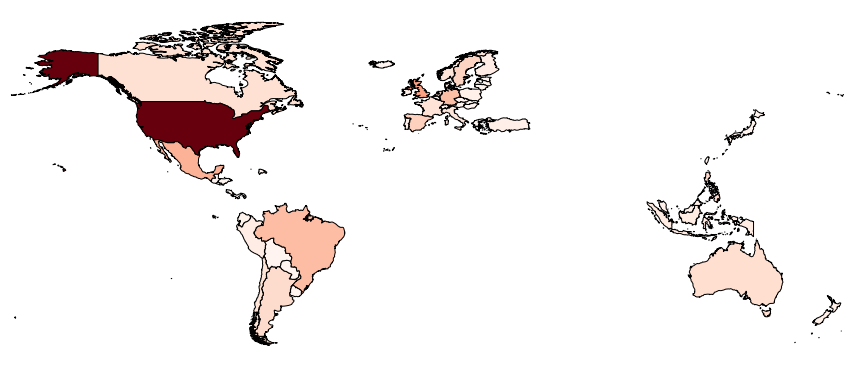

In [31]:
# creating plot map
gp = gplt.choropleth(
    country_g, hue = country_g['Streams'], scheme = None,
    cmap='Reds', figsize=(15, 15)
)

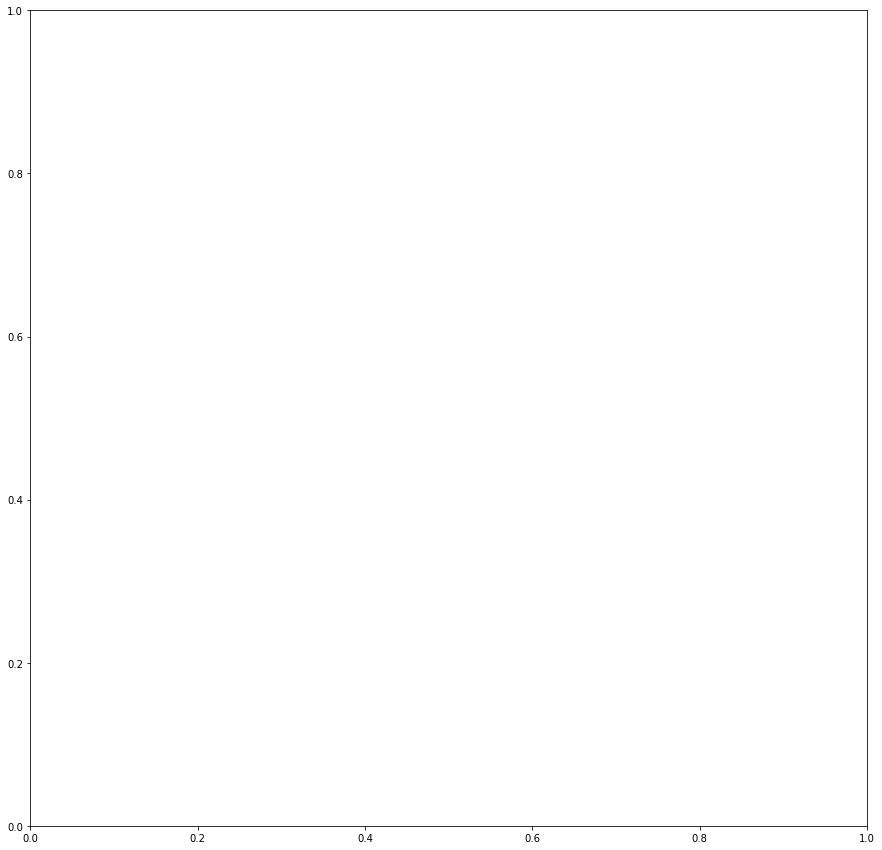

In [32]:
# Creating a subplot with `fig` and `ax`.
fig, ax = plt.subplots(1, figsize=(15, 15))

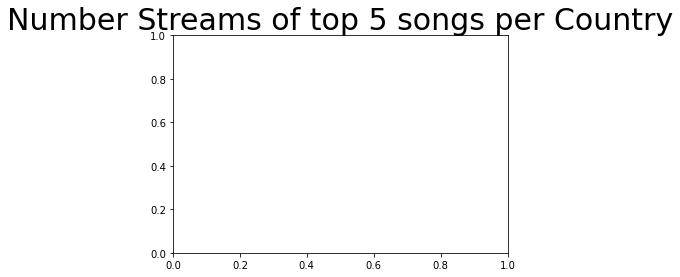

In [34]:
plt.title('Number Streams of top 5 songs per Country', size=30)
tl = country_g.plot(column='Streams',
cmap='Reds',      # Color map for the country                   
             linewidth=0.6,      # Line width for country borders
             ax=ax,              # Plotting the map on `ax`
             edgecolor='black'); # State border colors

In [36]:
c_bar_colors = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=country_g['Streams'].min(), vmax=country_g['Streams'].max()))

# Plot the colorbar.
color_bar = fig.colorbar(c_bar_colors)

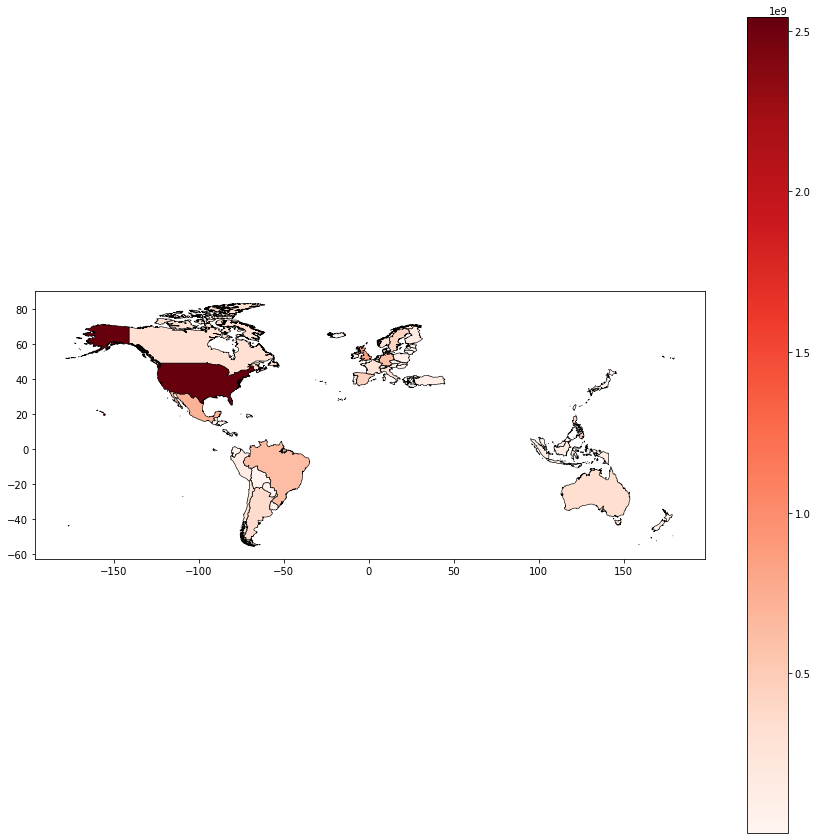

In [37]:
tl.figure

This figure tells me which countries have the most streams on spotify and by what magnitude.

It shows me that the data set provided of the 53 countries did not include many Western Asian countries.

Looking at this, my initial observation would be that population and population density doesn't have a large affect on number of streams but futher analysis would have to be conducted to figure this out.